#Fusion de base de datos - PAC

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/DATA HUNTERS - DSRP 2022/1.- BASE DE DATOS/1.- CONOSCE/"
os.chdir(path)

In [ ]:
# TRABAJAMOS PRIMERO CON EL "PLAN ANUAL DE CONTRATACIONES"

#pac18 = pd.read_excel('CONOSCE_PAC2018_0.xlsx', header=1)
#pac19 = pd.read_excel('CONOSCE_PAC2019_0.xlsx', header=1)
#pac20 = pd.read_excel('CONOSCE_PAC2020_0.xlsx', header=1)
#pac21 = pd.read_excel('CONOSCE_PAC2021_0.xlsx', header=1)

#frames = [pac18, pac19, pac20, pac21]
#pac = pd.concat(frames)
#pac.head()

# Trabajamos con el año 2019
1.- uniremos las bases de convocatorias con las adjudicaciones de ese año

In [ ]:
# Abrimos las BBDD
convocatoria = pd.read_excel("2.- DATOS DE LA CONVOCATORIA O INVITACION/CONOSCE_CONVOCATORIAS2019_0.xlsx", header=1)
adjudicacion = pd.read_excel("3.- DATOS DE LA ADJUDICACION/CONOSCE_ADJUDICACIONES2019_0.xlsx", header=1)
#Convertimos nombre de columnas en minisculas
convocatoria.columns = convocatoria.columns.str.lower()
adjudicacion.columns = adjudicacion.columns.str.lower()

In [ ]:
convocatoria.dtypes

In [ ]:
adjudicacion.dtypes

In [ ]:
convocatoria.shape

(58170, 28)

In [ ]:
convocatoria.head(2)
convocatoria.isnull().sum().sort_values(ascending=False)

In [ ]:
adjudicacion.head(2)
adjudicacion.isnull().sum().sort_values(ascending=False)

In [ ]:
# Usamos el comando "join" para unir las bases de datos.
contratos2019 = adjudicacion.join(convocatoria.set_index('codigoconvocatoria'), on = 'codigoconvocatoria', how='left', lsuffix='_conv', rsuffix='_abj')
contratos2019.dtypes

In [ ]:
contratos2019_uit["moneda_abj"].value_counts()

Soles           119408
Nuevos Soles    105284
Euro              6361
Name: moneda_abj, dtype: int64

In [ ]:
# Filtramos contratos menores a 8-UIT
contratos2019 = contratos2019[(contratos2019["moneda_abj"]== "Soles") | (contratos2019["moneda_abj"]== "Nuevos Soles")  | (contratos2019["moneda_abj"]== "Euro") | (contratos2019["moneda_abj"]== "Dólar Norteamericano")]
contratos2019.shape

(264499, 45)

In [ ]:
contratos2019["moneda_abj"].value_counts()

Soles                   119408
Nuevos Soles            105284
Dólar Norteamericano     33446
Euro                      6361
Name: moneda_abj, dtype: int64

In [ ]:
contratos2019.isnull().sum().sort_values(ascending=False)

departamento_item              104809
provincia_item                 104809
distrito_item                  104809
itemcubso                       18776
codigoitem                      18776
fecha_consentimiento_bp           532
sistema_contratacion               28
unidad_medida_abj                   1
unidad_medida_conv                  1
monto_adjudicado_item               0
fecha_buenapro                      0
fecha_convocatoria_conv             0
tipo_proveedor                      0
proveedor                           0
ruc_proveedor                       0
moneda_conv                         0
fechapresentacionpropuesta          0
monto_referencial_item_conv         0
cantidad_adjudicado_item            0
codigoentidad_abj                   0
descripcion_item_conv               0
n_item_conv                         0
proceso_conv                        0
codigoconvocatoria                  0
entidad_ruc_conv                    0
estado_item                         0
descripcion_

In [ ]:
contratos2019['departamento_item'].value_counts()

LIMA                  102758
CUSCO                   5915
PIURA                   5429
AREQUIPA                4777
ANCASH                  4199
CALLAO                  3982
LA LIBERTAD             3603
JUNIN                   2732
AYACUCHO                2517
CAJAMARCA               2477
PUNO                    2469
SAN MARTIN              2198
HUANUCO                 2088
APURIMAC                1800
LORETO                  1764
LAMBAYEQUE              1737
HUANCAVELICA            1703
AMAZONAS                1143
TACNA                   1052
PASCO                    975
UCAYALI                  957
ICA                      818
MADRE DE DIOS            752
MOQUEGUA                 702
MULTIDEPARTAMENTAL       522
TUMBES                   481
EXTERIOR                 140
Name: departamento_item, dtype: int64

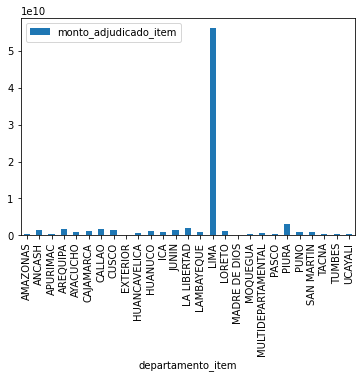

In [ ]:
conv_uit_reg = pd.pivot_table(contratos2019_uit, index=["departamento_item"], values=['monto_adjudicado_item'], aggfunc=np.sum)
conv_uit_reg.plot(kind = 'bar')